In [1]:
from pylab import *
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot


In [2]:

##Defino parámetros

m_s = 1.989 * 10**30                            ## Kg
pc = 3.24 * 10**(-17)                           ## metro a kiloparséc
G = 6.674 * 10 ** (-11)                         ##  N m^2 / kg^2
n = 5.8
rs = 20000                                  ## escalador de radio
dn = 2 * n

##Densidades:
rho_s = 4.58695 * 10**27
rho_c = 0.35 * 1.783 * 10**(-21)                     ## kg/m^3
rho_c_pc = rho_c / pc**3

#Valores de masas según libro:

M_bulge =  1.6 * 10**(10) * m_s
M_s_halo = 4 * 10**8 * m_s

#Distribuciones de densidad

def NFW(x):
    y = (rho_c_pc) /((x/rs) * (1+(x/rs))**2)
    return y

def EIN(x):
    y = rho_s * np.exp(-dn * (((x/rs)**(1/n))-1))
    return y


##Distribuciones de masa

def MD(x):
    y =  1.01 *   m_s * 10**7 * (3105.94 - (x * e **(-x/3500) + 3500 * e**(-x/3500))) 
    return y

def MH1(x):
    y =  4 * pi * rho_c_pc * rs**3 * (np.log((x+rs)/rs) - (x/(x+rs))) 
    return y

def integral(x):
    I = EIN(x)*x**2
    return I

def MH2(x):
    y = 4 *pi * (quad(integral, 0, x)[0])  
    return y

def VB(x): 
    r = x * 3.086 * 10**(16)
    y = sqrt((MD(x)+M_bulge+M_s_halo)* G/ r) * 10**(-3) 
    return y

def VMO(x):
    r = x * 3.086 * 10**(16)
    y = sqrt((MD(x)+M_bulge+M_s_halo+MH1(x)) * G/ r) * 10**(-3) 
    return y



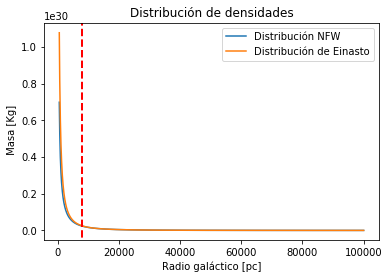

<Figure size 720x14400 with 0 Axes>

In [4]:
# array de valores a representar
x = linspace(500, 100000, 2000)
fig, ax = pyplot.subplots()
p1, p2= pyplot.plot(x, NFW(x), x, EIN(x))
#pyplot.yscale('log') 
#pyplot.xscale('log') 

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('Distribución NFW', 'Distribución de Einasto'),
prop = {'size': 10}, loc='upper right')
ax.axvline(x=8000, ymin=-15.0, ymax=15.0, linewidth=2.0,
           color='red', linestyle='--')
xlabel('Radio galáctico [pc]')
ylabel(' Masa [Kg]')
title('Distribución de densidades')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))

pyplot.show()

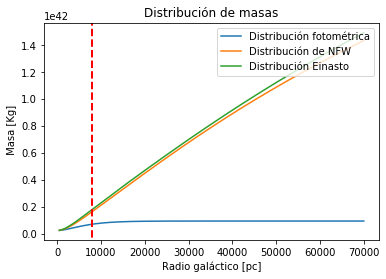

<Figure size 720x14400 with 0 Axes>

In [5]:
MH2_list = []
list = np.linspace(500, 70000, 2000)
for m in list:

    mh = MH2(m)+MD(m)+M_bulge+M_s_halo
    MH2_list.append(mh)
    

# array de valores a representar
x = linspace(500, 70000, 2000)
fig, ax = plt.subplots()
p1, p2, p3= plot(x, (MD(x)+M_bulge+M_s_halo), x, (MD(x)+M_bulge+M_s_halo+MH1(x)), list, MH2_list)

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('Distribución fotométrica', 'Distribución de NFW','Distribución Einasto'),
prop = {'size': 10}, loc='upper right')
ax.axvline(x=8000, ymin=-15.0, ymax=15.0, linewidth=2.0,
           color='red', linestyle='--')
xlabel('Radio galáctico [pc]')
ylabel(' Masa [Kg]')
title('Distribución de masas')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))



show()

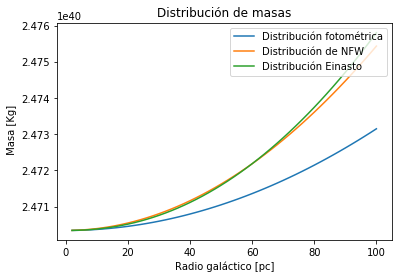

<Figure size 720x14400 with 0 Axes>

In [34]:
MH2_list = []
list = np.linspace(2, 100, 50)
for m in list:

    mh = MH2(m)+MD(m)+M_bulge+M_s_halo
    MH2_list.append(mh)
    

# array de valores a representar
x = linspace(2, 100, 50)
fig, ax = plt.subplots()
p1, p2, p3= plot(x, (MD(x)+M_bulge+M_s_halo), x, (MD(x)+M_bulge+M_s_halo+MH1(x)), list, MH2_list)

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('Distribución fotométrica', 'Distribución de NFW','Distribución Einasto'),
prop = {'size': 10}, loc='upper right')

xlabel('Radio galáctico [pc]')
ylabel(' Masa [Kg]')
title('Distribución de masas')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))



show()

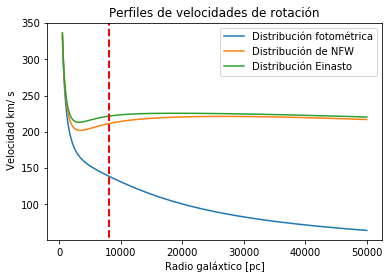

<Figure size 1080x576 with 0 Axes>

In [7]:
VMO_list = []
list = np.linspace(500, 50000, 2000)
for m in list:
    r = m * 3.086 * 10**(16)
    mh = sqrt((MD(m)+M_bulge+M_s_halo+MH2(m)) * G/ r) * 10**(-3) 
    VMO_list.append(mh)

# array de valores a representar
x = linspace(500, 50000, 2000)

fig, ax = plt.subplots()

p1, p2, p3= plot(x, VB(x), x, (VMO(x)), list, VMO_list)


ax.axvline(x=8000, ymin=-15.0, ymax=15.0, linewidth=2.0,
           color='red', linestyle='--')

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('Distribución fotométrica', 'Distribución de NFW', 'Distribución Einasto'),
prop = {'size': 10}, loc='upper right')

xlabel('Radio galáxtico [pc]')
ylabel(' Velocidad km/ s')
title('Perfiles de velocidades de rotación')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(15, 8))

show()

In [30]:
NFW(rs)

4.586953796376263e+27

In [ ]:
np.degrees(pi)